In [26]:
import gymnasium as gym
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from collections import deque
import random
import time
import matplotlib.pyplot as plt

## TD v1

In [3]:
env = gym.make('CartPole-v1', render_mode='human')

# Define the number of bins for each state dimension
num_bins = 100
bins = [np.linspace(-4.8, 4.8, num_bins),
        np.linspace(-50, 4, num_bins),
        np.linspace(-0.418, 0.418, num_bins),
        np.linspace(-4, 4, num_bins)]

# Initialize V as a zeros array with the shape of the discretized state space
V = np.zeros((num_bins, num_bins, num_bins, num_bins))

alpha = 0.5
gamma = 1.0

num_episodes = 5


# def discretize_state(state):
#     discretized = []
#     for i, _ in enumerate(state):
#         discretized.append(np.digitize(state[i], bins[i]) - 1)
#     return tuple(discretized)

def discretize_state(state):
    discretized = []
    for i, _ in enumerate(state):
        discretized_value = np.digitize(state[i], bins[i]) - 1
        discretized.append(discretized_value)
    
    print(f"Received State: {state}")
    print(f"Discretized State: {discretized}")
    print()
    
    return tuple(discretized)

for episode in range(num_episodes):
    state, _ = env.reset()
    state = discretize_state(state)
    terminated = False
    truncated = False
    total_reward = 0
    
    while not (terminated or truncated):
        env.render()
        time.sleep(0.01)  # Add a small delay to allow rendering
        
        # Choose an action based on the current state (e.g., random action)
        action = env.action_space.sample()
        
        # Take the action and observe the next state and reward
        next_state, reward, terminated, truncated, _ = env.step(action)
        next_state = discretize_state(next_state)
        
        # TD(0) update rule
        V[state] = V[state] + alpha * (reward + gamma * V[next_state] - V[state])
        
        state = next_state
        total_reward += reward
    
    print(f"Episode: {episode+1}, Total Reward: {total_reward}")

env.close()

Received State: [ 0.03711609 -0.01294818  0.0063078   0.04954682]
Discretized State: [49, 91, 50, 50]

Received State: [ 0.03685712  0.18208276  0.00729873 -0.24113928]
Discretized State: [49, 92, 50, 46]

Received State: [ 0.04049878 -0.01314269  0.00247595  0.0538369 ]
Discretized State: [49, 91, 49, 50]

Received State: [ 0.04023593  0.18194367  0.00355269 -0.23806383]
Discretized State: [49, 92, 49, 46]

Received State: [ 0.0438748  -0.01322885 -0.00120859  0.05573761]
Discretized State: [49, 91, 49, 50]

Received State: [ 4.3610223e-02 -2.0833345e-01 -9.3838069e-05  3.4803897e-01]
Discretized State: [49, 91, 49, 53]

Received State: [ 0.03944356 -0.40345407  0.00686694  0.6406923 ]
Discretized State: [49, 90, 50, 57]

Received State: [ 0.03137447 -0.5986711   0.01968079  0.93552977]
Discretized State: [49, 90, 51, 61]

Received State: [ 0.01940105 -0.79405284  0.03839138  1.2343315 ]
Discretized State: [49, 90, 54, 64]

Received State: [ 0.00351999 -0.59944487  0.06307802  0.95391

## TD V2

In [8]:
env = gym.make('CartPole-v1', render_mode='rgb_array')

# Define the number of bins for each state dimension
num_bins = 100
bins = [np.linspace(-4.8, 4.8, num_bins),
        np.linspace(-50, 4, num_bins),
        np.linspace(-0.418, 0.418, num_bins),
        np.linspace(-4, 4, num_bins)]

# Initialize V as a zeros array with the shape of the discretized state space
V = np.zeros((num_bins, num_bins, num_bins, num_bins))

alpha = 0.5
gamma = 1.0

num_episodes = 1000

def discretize_state(state):
    discretized = []
    for i, _ in enumerate(state):
        discretized.append(np.digitize(state[i], bins[i]) - 1)
    return tuple(discretized)

def choose_action(state):
    # Get the discretized next states for each action
    next_states = []
    for action in range(env.action_space.n):
        next_state, _, _, _, _ = env.step(action)
        next_state = discretize_state(next_state)
        next_states.append(next_state)
    
    # Choose the action that leads to the next state with the highest value
    best_action = np.argmax([V[next_state] for next_state in next_states])
    
    return best_action

# Initialize a list to store the total rewards for each episode
total_rewards = []

for episode in range(num_episodes):
    state, _ = env.reset()
    state = discretize_state(state)
    terminated = False
    truncated = False
    total_reward = 0
    
    while not (terminated or truncated):
        env.render()
        # time.sleep(0.01)  # Add a small delay to allow rendering
        
        # Choose an action based on the greedy policy
        action = choose_action(state)
        
        # Take the action and observe the next state and reward
        next_state, reward, terminated, truncated, _ = env.step(action)
        next_state = discretize_state(next_state)
        
        # TD(0) update rule
        V[state] = V[state] + alpha * (reward + gamma * V[next_state] - V[state])
        
        state = next_state
        total_reward += reward
    
    print(f"Episode: {episode+1}, Total Reward: {total_reward}")
    total_rewards.append(total_reward)

env.close()

Episode: 1, Total Reward: 5.0
Episode: 2, Total Reward: 5.0
Episode: 3, Total Reward: 5.0
Episode: 4, Total Reward: 5.0
Episode: 5, Total Reward: 5.0
Episode: 6, Total Reward: 9.0
Episode: 7, Total Reward: 5.0
Episode: 8, Total Reward: 4.0
Episode: 9, Total Reward: 7.0
Episode: 10, Total Reward: 6.0
Episode: 11, Total Reward: 5.0
Episode: 12, Total Reward: 16.0
Episode: 13, Total Reward: 5.0
Episode: 14, Total Reward: 13.0
Episode: 15, Total Reward: 7.0
Episode: 16, Total Reward: 7.0
Episode: 17, Total Reward: 6.0
Episode: 18, Total Reward: 10.0
Episode: 19, Total Reward: 5.0
Episode: 20, Total Reward: 17.0
Episode: 21, Total Reward: 4.0
Episode: 22, Total Reward: 15.0
Episode: 23, Total Reward: 13.0
Episode: 24, Total Reward: 4.0
Episode: 25, Total Reward: 6.0
Episode: 26, Total Reward: 11.0
Episode: 27, Total Reward: 4.0
Episode: 28, Total Reward: 13.0
Episode: 29, Total Reward: 5.0
Episode: 30, Total Reward: 6.0
Episode: 31, Total Reward: 10.0
Episode: 32, Total Reward: 7.0
Episode:

NameError: name 'plt' is not defined

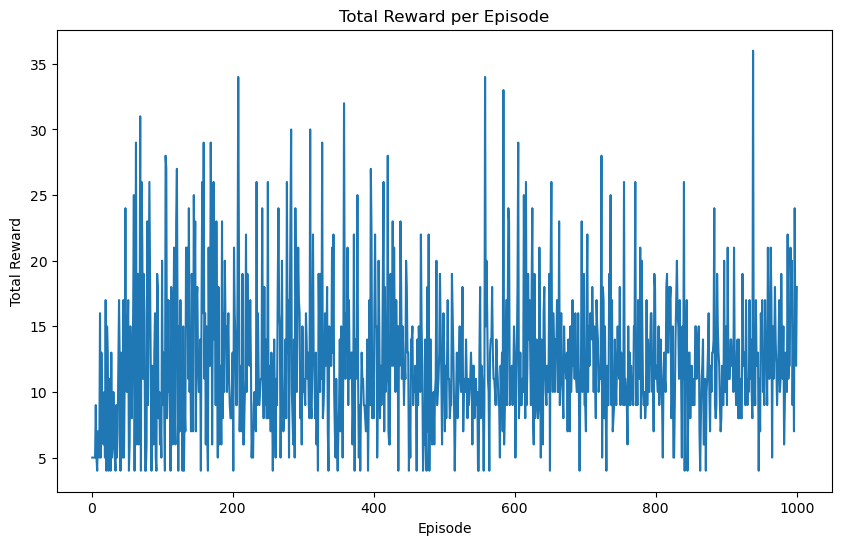

In [10]:
# Plot the total rewards over episodes
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_episodes + 1), total_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode')
plt.show()

## Q learning 

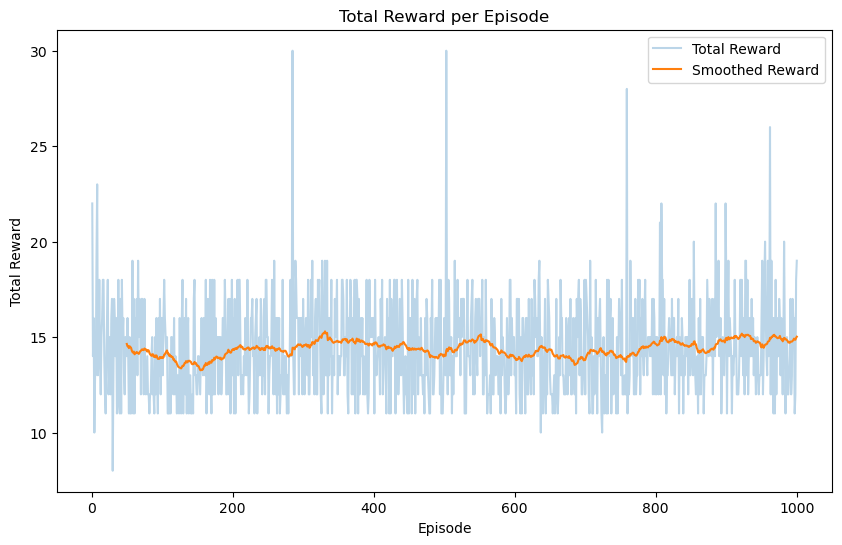

In [18]:
env = gym.make('CartPole-v1', render_mode='rgb_array')

# Define the number of bins for each state dimension
num_bins = 10
bins = [np.linspace(-4.8, 4.8, num_bins),
        np.linspace(-4, 4, num_bins),
        np.linspace(-0.418, 0.418, num_bins),
        np.linspace(-4, 4, num_bins)]

# Initialize Q as a zeros array with the shape of the discretized state-action space
Q = np.zeros((num_bins, num_bins, num_bins, num_bins, env.action_space.n))

alpha = 0.5
gamma = 1.0

num_episodes = 1000

def discretize_state(state):
    discretized = []
    for i, _ in enumerate(state):
        discretized.append(np.digitize(state[i], bins[i]) - 1)
    return tuple(discretized)

def choose_action(state, epsilon):
    if np.random.uniform(0, 1) < epsilon:
        # Explore: choose a random action
        return env.action_space.sample()
    else:
        # Exploit: choose the action with the highest Q-value for the current state
        return np.argmax(Q[state])

# Initialize a list to store the total rewards for each episode
total_rewards = []

for episode in range(num_episodes):
    state, _ = env.reset()
    state = discretize_state(state)
    terminated = False
    truncated = False
    total_reward = 0
    
    # Choose the initial action using an epsilon-greedy policy
    epsilon = 1.0 / (episode + 1)
    action = choose_action(state, epsilon)
    
    while not (terminated or truncated):
        env.render()
        # time.sleep(0.01)  # Add a small delay to allow rendering
        
        # Take the action and observe the next state and reward
        next_state, reward, terminated, truncated, _ = env.step(action)
        next_state = discretize_state(next_state)
        
        # Choose the next action using an epsilon-greedy policy
        next_action = choose_action(next_state, epsilon)
        
        # SARSA update rule
        Q[state][action] = Q[state][action] + alpha * (reward + gamma * Q[next_state][next_action] - Q[state][action])
        
        state = next_state
        action = next_action
        total_reward += reward
    
    # print(f"Episode: {episode+1}, Total Reward: {total_reward}")
    total_rewards.append(total_reward)

env.close()

# Calculate the moving average of the total rewards
window_size = 20
smoothed_rewards = np.convolve(total_rewards, np.ones(window_size) / window_size, mode='valid')

# Plot the total rewards and smoothed rewards over episodes
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_episodes + 1), total_rewards, alpha=0.3, label='Total Reward')
plt.plot(range(window_size, num_episodes + 1), smoothed_rewards, label='Smoothed Reward')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode')
plt.legend()
plt.show()

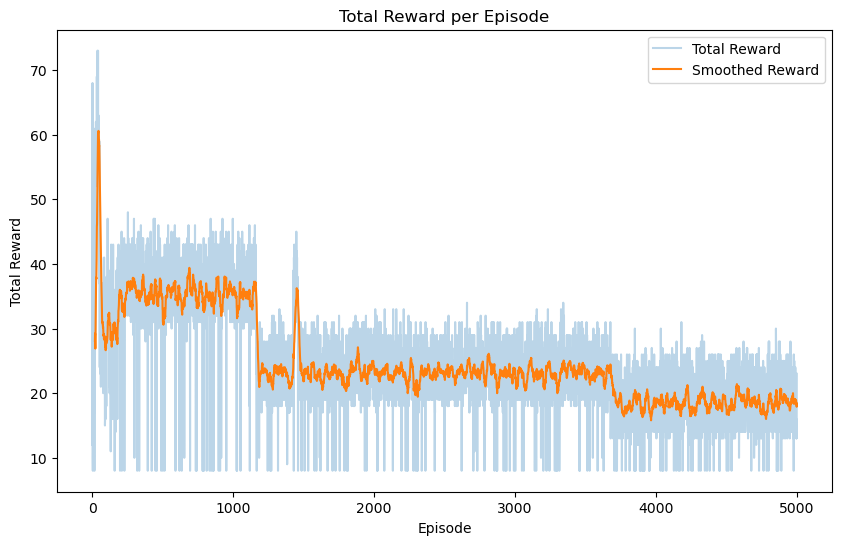

In [19]:
env = gym.make('CartPole-v1', render_mode='rgb_array')

# Define the number of bins for each state dimension
num_bins = 10
bins = [np.linspace(-4.8, 4.8, num_bins),
        np.linspace(-4, 4, num_bins),
        np.linspace(-0.418, 0.418, num_bins),
        np.linspace(-4, 4, num_bins)]

# Initialize Q as a zeros array with the shape of the discretized state-action space
Q = np.zeros((num_bins, num_bins, num_bins, num_bins, env.action_space.n))

alpha = 0.5
gamma = 1.0

num_episodes = 5000

def discretize_state(state):
    discretized = []
    for i, _ in enumerate(state):
        discretized.append(np.digitize(state[i], bins[i]) - 1)
    return tuple(discretized)

def choose_action(state, epsilon):
    if np.random.uniform(0, 1) < epsilon:
        # Explore: choose a random action
        return env.action_space.sample()
    else:
        # Exploit: choose the action with the highest Q-value for the current state
        return np.argmax(Q[state])

# Initialize a list to store the total rewards for each episode
total_rewards = []

for episode in range(num_episodes):
    state, _ = env.reset()
    state = discretize_state(state)
    terminated = False
    truncated = False
    total_reward = 0
    
    # Choose the initial action using an epsilon-greedy policy
    epsilon = 1.0 / (episode + 1)
    action = choose_action(state, epsilon)
    
    while not (terminated or truncated):
        env.render()
        # time.sleep(0.01)  # Add a small delay to allow rendering
        
        # Take the action and observe the next state and reward
        next_state, reward, terminated, truncated, _ = env.step(action)
        next_state = discretize_state(next_state)
        
        # Choose the next action using an epsilon-greedy policy
        next_action = choose_action(next_state, epsilon)
        
        # SARSA update rule
        Q[state][action] = Q[state][action] + alpha * (reward + gamma * Q[next_state][next_action] - Q[state][action])
        
        state = next_state
        action = next_action
        total_reward += reward
    
    # print(f"Episode: {episode+1}, Total Reward: {total_reward}")
    total_rewards.append(total_reward)

env.close()

# Calculate the moving average of the total rewards
window_size = 20
smoothed_rewards = np.convolve(total_rewards, np.ones(window_size) / window_size, mode='valid')

# Plot the total rewards and smoothed rewards over episodes
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_episodes + 1), total_rewards, alpha=0.3, label='Total Reward')
plt.plot(range(window_size, num_episodes + 1), smoothed_rewards, label='Smoothed Reward')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode')
plt.legend()
plt.show()

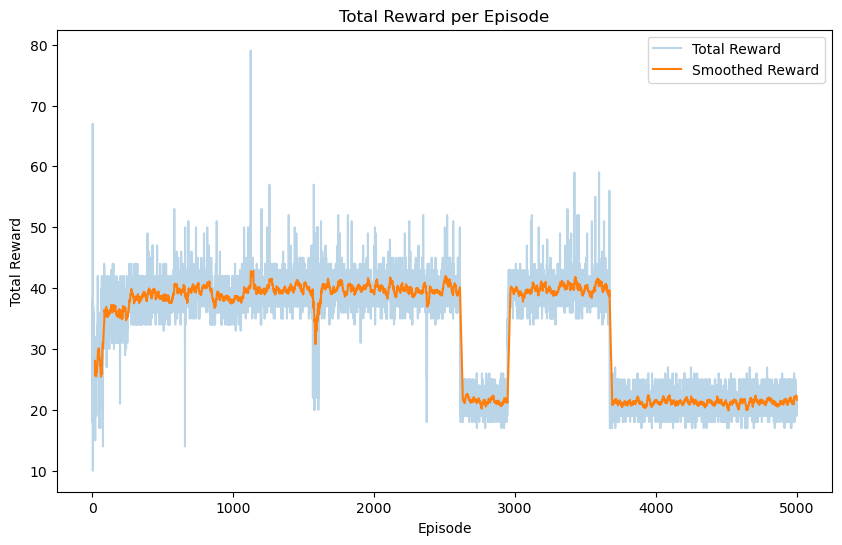

In [20]:
env = gym.make('CartPole-v1', render_mode='rgb_array')

# Define the number of bins for each state dimension
num_bins = 10
bins = [np.linspace(-4.8, 4.8, num_bins),
        np.linspace(-4, 4, num_bins),
        np.linspace(-0.418, 0.418, num_bins),
        np.linspace(-4, 4, num_bins)]

# Initialize Q as a zeros array with the shape of the discretized state-action space
Q = np.zeros((num_bins, num_bins, num_bins, num_bins, env.action_space.n))

alpha = 0.5
gamma = 0.8

num_episodes = 5000

def discretize_state(state):
    discretized = []
    for i, _ in enumerate(state):
        discretized.append(np.digitize(state[i], bins[i]) - 1)
    return tuple(discretized)

def choose_action(state, epsilon):
    if np.random.uniform(0, 1) < epsilon:
        # Explore: choose a random action
        return env.action_space.sample()
    else:
        # Exploit: choose the action with the highest Q-value for the current state
        return np.argmax(Q[state])

# Initialize a list to store the total rewards for each episode
total_rewards = []

for episode in range(num_episodes):
    state, _ = env.reset()
    state = discretize_state(state)
    terminated = False
    truncated = False
    total_reward = 0
    
    # Choose the initial action using an epsilon-greedy policy
    epsilon = 1.0 / (episode + 1)
    action = choose_action(state, epsilon)
    
    while not (terminated or truncated):
        env.render()
        # time.sleep(0.01)  # Add a small delay to allow rendering
        
        # Take the action and observe the next state and reward
        next_state, reward, terminated, truncated, _ = env.step(action)
        next_state = discretize_state(next_state)
        
        # Choose the next action using an epsilon-greedy policy
        next_action = choose_action(next_state, epsilon)
        
        # SARSA update rule
        Q[state][action] = Q[state][action] + alpha * (reward + gamma * Q[next_state][next_action] - Q[state][action])
        
        state = next_state
        action = next_action
        total_reward += reward
    
    # print(f"Episode: {episode+1}, Total Reward: {total_reward}")
    total_rewards.append(total_reward)

env.close()

# Calculate the moving average of the total rewards
window_size = 20
smoothed_rewards = np.convolve(total_rewards, np.ones(window_size) / window_size, mode='valid')

# Plot the total rewards and smoothed rewards over episodes
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_episodes + 1), total_rewards, alpha=0.3, label='Total Reward')
plt.plot(range(window_size, num_episodes + 1), smoothed_rewards, label='Smoothed Reward')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode')
plt.legend()
plt.show()

## SARSA

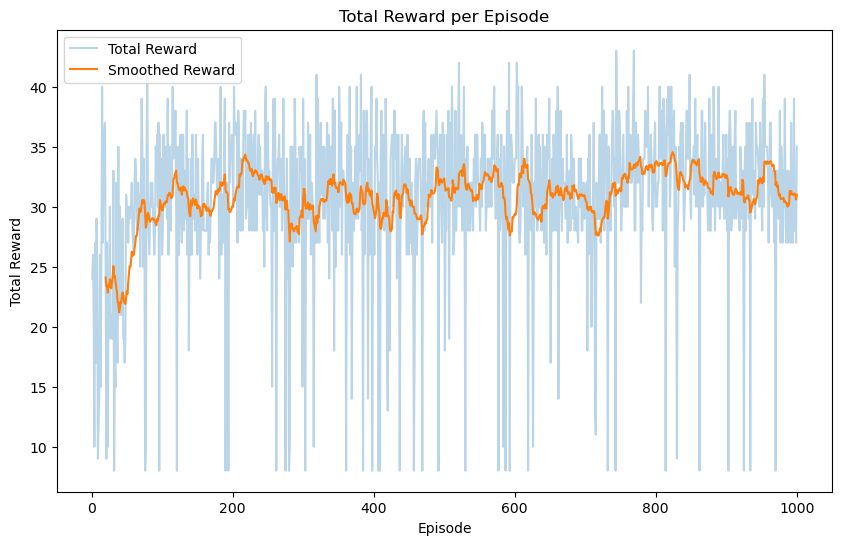

In [22]:
env = gym.make('CartPole-v1', render_mode='rgb_array')

# Define the number of bins for each state dimension
num_bins = 10
bins = [np.linspace(-4.8, 4.8, num_bins),
        np.linspace(-4, 4, num_bins),
        np.linspace(-0.418, 0.418, num_bins),
        np.linspace(-4, 4, num_bins)]

# Initialize Q as a zeros array with the shape of the discretized state-action space
Q = np.zeros((num_bins, num_bins, num_bins, num_bins, env.action_space.n))

alpha = 0.5
gamma = 1.0

num_episodes = 1000

def discretize_state(state):
    discretized = []
    for i, _ in enumerate(state):
        discretized.append(np.digitize(state[i], bins[i]) - 1)
    return tuple(discretized)

def choose_action(state, epsilon):
    if np.random.uniform(0, 1) < epsilon:
        # Explore: choose a random action
        return env.action_space.sample()
    else:
        # Exploit: choose the action with the highest Q-value for the current state
        return np.argmax(Q[state])

# Initialize a list to store the total rewards for each episode
total_rewards = []

for episode in range(num_episodes):
    state, _ = env.reset()
    state = discretize_state(state)
    terminated = False
    truncated = False
    total_reward = 0
    
    # Choose the initial action using an epsilon-greedy policy
    epsilon = 1.0 / (episode + 1)
    action = choose_action(state, epsilon)
    
    while not (terminated or truncated):
        env.render()
        time.sleep(0.01)  # Add a small delay to allow rendering
        
        # Take the action and observe the next state and reward
        next_state, reward, terminated, truncated, _ = env.step(action)
        next_state = discretize_state(next_state)
        
        # Choose the next action using an epsilon-greedy policy
        next_action = choose_action(next_state, epsilon)
        
        # SARSA update rule
        Q[state][action] = Q[state][action] + alpha * (reward + gamma * Q[next_state][next_action] - Q[state][action])
        
        state = next_state
        action = next_action
        total_reward += reward
    
    # print(f"Episode: {episode+1}, Total Reward: {total_reward}")
    total_rewards.append(total_reward)

env.close()

# Calculate the moving average of the total rewards
window_size = 20
smoothed_rewards = np.convolve(total_rewards, np.ones(window_size) / window_size, mode='valid')

# Plot the total rewards and smoothed rewards over episodes
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_episodes + 1), total_rewards, alpha=0.3, label='Total Reward')
plt.plot(range(window_size, num_episodes + 1), smoothed_rewards, label='Smoothed Reward')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode')
plt.legend()
plt.show()

## SARSA Torch

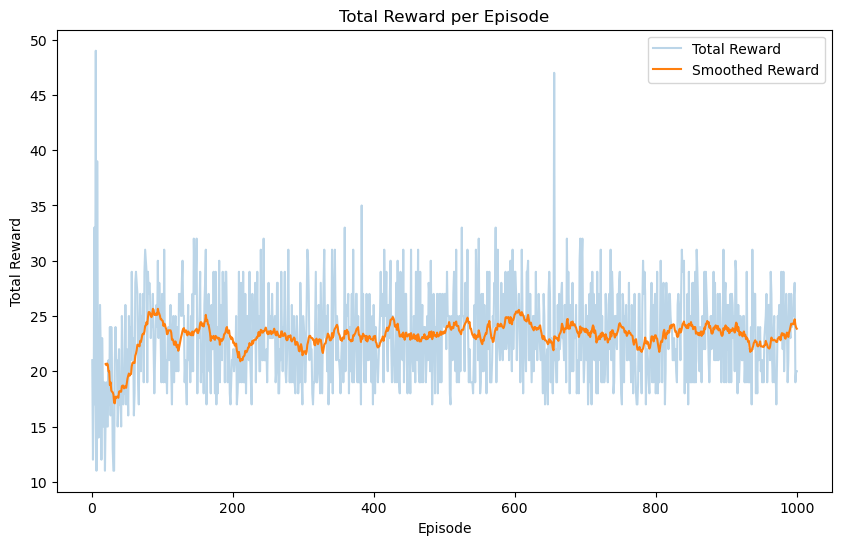

In [25]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

env = gym.make('CartPole-v1', render_mode='rgb_array')

# Define the number of bins for each state dimension
num_bins = 10
bins = [torch.linspace(-4.8, 4.8, num_bins),
        torch.linspace(-4, 4, num_bins),
        torch.linspace(-0.418, 0.418, num_bins),
        torch.linspace(-4, 4, num_bins)]

# Initialize Q as a zeros tensor with the shape of the discretized state-action space
Q = torch.zeros((num_bins, num_bins, num_bins, num_bins, env.action_space.n)).to(device)

alpha = 0.5
gamma = 1.0

num_episodes = 1000

def discretize_state(state):
    discretized = []
    for i, _ in enumerate(state):
        discretized.append(torch.bucketize(torch.tensor(state[i]), bins[i]).item() - 1)
    return tuple(discretized)

def choose_action(state, epsilon):
    if np.random.uniform(0, 1) < epsilon:
        # Explore: choose a random action
        return env.action_space.sample()
    else:
        # Exploit: choose the action with the highest Q-value for the current state
        return torch.argmax(Q[state]).item()

# Initialize a list to store the total rewards for each episode
total_rewards = []

for episode in range(num_episodes):
    state, _ = env.reset()
    state = discretize_state(state)
    terminated = False
    truncated = False
    total_reward = 0
    
    # Choose the initial action using an epsilon-greedy policy
    epsilon = 1.0 / (episode + 1)
    action = choose_action(state, epsilon)
    
    while not (terminated or truncated):
        env.render()
        time.sleep(0.01)  # Add a small delay to allow rendering
        
        # Take the action and observe the next state and reward
        next_state, reward, terminated, truncated, _ = env.step(action)
        next_state = discretize_state(next_state)
        
        # Choose the next action using an epsilon-greedy policy
        next_action = choose_action(next_state, epsilon)
        
        # SARSA update rule
        Q[state][action] = Q[state][action] + alpha * (reward + gamma * Q[next_state][next_action] - Q[state][action])
        
        state = next_state
        action = next_action
        total_reward += reward
    
    # print(f"Episode: {episode+1}, Total Reward: {total_reward}")
    total_rewards.append(total_reward)

env.close()

# Calculate the moving average of the total rewards
window_size = 20
smoothed_rewards = np.convolve(total_rewards, np.ones(window_size) / window_size, mode='valid')

# Plot the total rewards and smoothed rewards over episodes
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_episodes + 1), total_rewards, alpha=0.3, label='Total Reward')
plt.plot(range(window_size, num_episodes + 1), smoothed_rewards, label='Smoothed Reward')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode')
plt.legend()
plt.show()

## Q-Learning Torch

cuda


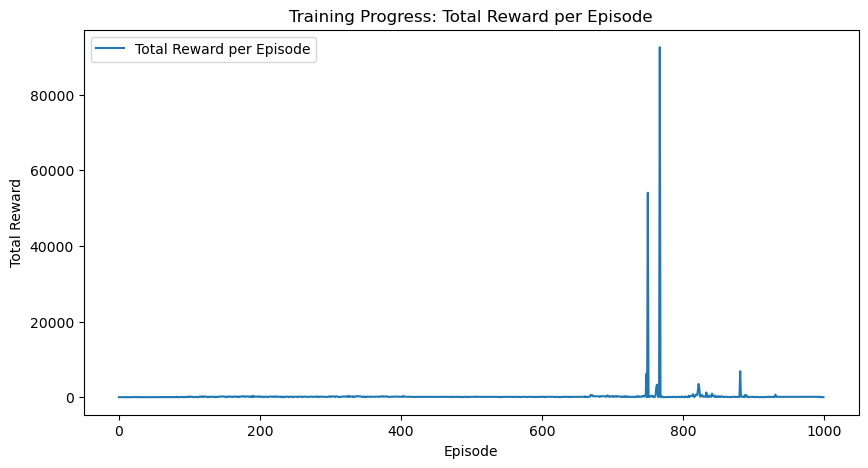

In [47]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(device)
# Hyperparameters
gamma = 0.99
batch_size = 64
learning_rate = 0.001
memory_size = 10000
eps_start = 1.0
eps_end = 0.1
eps_decay = 0.995
target_update = 10

# Define the Q-Network
class QNetwork(nn.Module):
    def __init__(self, state_size, action_size):
        super(QNetwork, self).__init__()
        self.fc1 = nn.Linear(state_size, 24)
        self.fc2 = nn.Linear(24, 24)
        self.fc3 = nn.Linear(24, action_size)
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        # Ensure the output is of shape [batch_size, action_size]
        x = x.view(-1, action_size)  # Reshape to remove any unwanted dimensions
        # Debugging outputs
        return x

# Replay Buffer
class ReplayBuffer:
    def __init__(self, capacity):
        self.buffer = deque(maxlen=capacity)
    
    def push(self, state, action, reward, next_state, done):
        self.buffer.append((state, action, reward, next_state, done))
    
    def sample(self, batch_size):
        state, action, reward, next_state, done = zip(*random.sample(self.buffer, batch_size))
        return np.stack(state), action, reward, np.stack(next_state), done
    
    def __len__(self):
        return len(self.buffer)

# Select action based on epsilon-greedy policy
def select_action(state, policy_net, epsilon, action_size):
    if random.random() < epsilon:
        return random.randrange(action_size)
    else:
        with torch.no_grad():
            return policy_net(state).argmax().item()

# Train the DQN
def optimize_model(policy_net, target_net, memory, optimizer):
    if len(memory) < batch_size:
        return
    states, actions, rewards, next_states, dones = memory.sample(batch_size)

    states = torch.tensor(states, dtype=torch.float32).cuda()
    actions = torch.tensor(actions, dtype=torch.long).unsqueeze(1).cuda()
    rewards = torch.tensor(rewards, dtype=torch.float32).unsqueeze(1).cuda()
    next_states = torch.tensor(next_states, dtype=torch.float32).cuda()
    dones = torch.tensor(dones, dtype=torch.float32).unsqueeze(1).cuda()
    
    # Compute Q values
    q_values = policy_net(states).gather(1, actions)
    next_q_values = target_net(next_states).max(1)[0].unsqueeze(1)
    expected_q_values = rewards + gamma * next_q_values * (1 - dones)

    # Compute loss
    loss = nn.MSELoss()(q_values, expected_q_values)

    # Optimize the model
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Main Training Loop
env = gym.make('CartPole-v1', render_mode='rgb_array')
state_size = env.observation_space.shape[0]
action_size = env.action_space.n

policy_net = QNetwork(state_size, action_size).cuda()
target_net = QNetwork(state_size, action_size).cuda()
target_net.load_state_dict(policy_net.state_dict())
target_net.eval()

optimizer = optim.Adam(policy_net.parameters(), lr=learning_rate)
memory = ReplayBuffer(memory_size)

epsilon = eps_start
num_episodes = 1000
total_rewards = []  # Initialize the total rewards list to store rewards from each episode

for episode in range(num_episodes):
    state, _ = env.reset()
    state = torch.tensor(state, dtype=torch.float32).unsqueeze(0).cuda()
    done = False
    total_reward = 0
    
    while not done:
        action = select_action(state, policy_net, epsilon, action_size)
        next_state, reward, done, _, _ = env.step(action)
        next_state = torch.tensor(next_state, dtype=torch.float32).unsqueeze(0).cuda()
        memory.push(state.cpu().numpy(), action, reward, next_state.cpu().numpy(), done)
        state = next_state
        total_reward += reward
        
        optimize_model(policy_net, target_net, memory, optimizer)
    
    # Update epsilon
    epsilon = max(eps_end, epsilon * eps_decay)
    
    # Update target network
    if episode % target_update == 0:
        target_net.load_state_dict(policy_net.state_dict())
    
    total_rewards.append(total_reward)  # Store the total reward for this episode

env.close()

# Plot the total rewards over episodes
plt.figure(figsize=(10, 5))
plt.plot(total_rewards, label='Total Reward per Episode')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Training Progress: Total Reward per Episode')
plt.legend()
plt.show()